# Практическое задание №2 по теме "Feed-forward neural network".

1. Добиться хорошего результата от модели, собранной на занятии (5 угаданныx картинок из 8 предложенных). 

Варианты изменений:
- изменение слоёв и их количества;
- изменение метода оптимизации;
- изменение процесса обучения;
- *преобразование данных transform

2. *Переписать данный туториал на PyTorch: https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ru

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torch import nn, optim
import torchvision.transforms as transforms
import torch.nn.functional as F

## Загрузка данных

In [2]:
train_dataset = torchvision.datasets.CIFAR10(root='data/', train=True, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Проверка:

In [4]:
image_tr, label_tr = train_dataset[222]
image_tst, label_tst = test_dataset[555]
print (image_tr.size(), image_tst.size())
print (label_tr, label_tst)

torch.Size([3, 32, 32]) torch.Size([3, 32, 32])
8 4


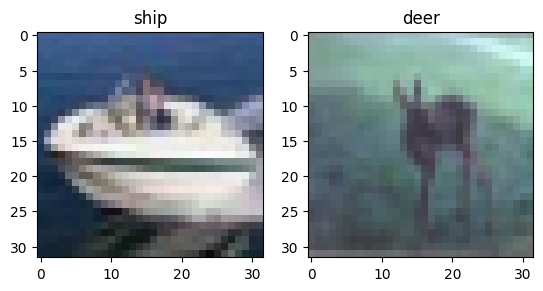

In [5]:
plt.subplot(121)
plt.imshow(image_tr.permute(1, 2, 0).numpy())
plt.title(classes[label_tr])
plt.subplot(122)
plt.imshow(image_tst.permute(1, 2, 0).numpy())
plt.title(classes[label_tst])
plt.show()

## Модель сети

Увеличим количество эпох до 25, увеличим *hidden_dim* до 128 и воспользуемся оптимизатором *Adam* со скоростью обучения 0.005

In [6]:
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 4 * hidden_dim)
        self.fc2 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc3 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)        
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        return x

    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        x = F.softmax(x)
        return x


net = Net(3072, 128, 10)
net.train()

Net(
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=10, bias=True)
)

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.005)

## Обучение

In [8]:
num_epochs = 25

for epoch in range(num_epochs):
    running_loss = 0.0
    running_items = 0.0

    for i, data in enumerate(train_loader):
        inputs, labels = data[0], data[1]

         # Обнуляем градиент
        optimizer.zero_grad()
        # Делаем предсказание
        outputs = net(inputs)
        # Рассчитываем лосс-функцию
        loss = criterion(outputs, labels)
        # Делаем шаг назад по лоссу
        loss.backward()
        # Делаем шаг нашего оптимайзера
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        running_items += len(labels)
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                  f'Step [{i + 1}/{len(train_loader)}]. ' \
                  f'Loss: {running_loss / running_items:.3f}')
            running_loss, running_items = 0.0, 0.0

print('Training is finished!')

Epoch [1/25]. Step [1/782]. Loss: 0.036
Epoch [1/25]. Step [301/782]. Loss: 0.033
Epoch [1/25]. Step [601/782]. Loss: 0.030
Epoch [2/25]. Step [1/782]. Loss: 0.029
Epoch [2/25]. Step [301/782]. Loss: 0.033
Epoch [2/25]. Step [601/782]. Loss: 0.030
Epoch [3/25]. Step [1/782]. Loss: 0.027
Epoch [3/25]. Step [301/782]. Loss: 0.028
Epoch [3/25]. Step [601/782]. Loss: 0.028
Epoch [4/25]. Step [1/782]. Loss: 0.030
Epoch [4/25]. Step [301/782]. Loss: 0.027
Epoch [4/25]. Step [601/782]. Loss: 0.027
Epoch [5/25]. Step [1/782]. Loss: 0.026
Epoch [5/25]. Step [301/782]. Loss: 0.026
Epoch [5/25]. Step [601/782]. Loss: 0.026
Epoch [6/25]. Step [1/782]. Loss: 0.024
Epoch [6/25]. Step [301/782]. Loss: 0.026
Epoch [6/25]. Step [601/782]. Loss: 0.030
Epoch [7/25]. Step [1/782]. Loss: 0.027
Epoch [7/25]. Step [301/782]. Loss: 0.026
Epoch [7/25]. Step [601/782]. Loss: 0.026
Epoch [8/25]. Step [1/782]. Loss: 0.024
Epoch [8/25]. Step [301/782]. Loss: 0.025
Epoch [8/25]. Step [601/782]. Loss: 0.025
Epoch [9

## Оценка

In [9]:
data_iter = iter(test_loader)
images, labels = next(data_iter)

LABELS:  horse frog truck ship plane cat ship ship


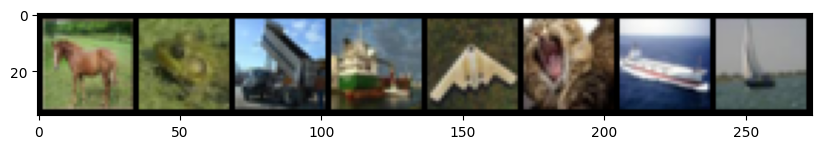

In [36]:
net.eval()
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.figure(figsize=(10,5))
plt.imshow(imgs.permute(1,2,0).numpy())
print("LABELS: ",' '.join(classes[labels[j]] for j in range(len(labels))))

In [37]:
_, predicted = torch.max(outputs, 1)
print(predicted)
print("LABELS: ",' '.join(classes[predicted[j]] for j in range(len(labels))))

tensor([4, 6, 9, 8, 6, 3, 8, 8])
LABELS:  deer frog truck ship frog cat ship ship


In [38]:
gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred = np.array([classes[predicted[j]] for j in range(len(labels))])

print(gt)
print(pred)
print(f'Accuracy is {(gt == pred).sum() / len(gt)}')

['horse' 'frog' 'truck' 'ship' 'plane' 'cat' 'ship' 'ship']
['deer' 'frog' 'truck' 'ship' 'frog' 'cat' 'ship' 'ship']
Accuracy is 0.75


Угадали 6 из 8

## Вывод

По заданию мы должны получить 5 из 8. Собственно говоря, мы это получили. Однако, не совсем понятно зачем тогда менять параметры сети. Ведь по сути мы берем первый батч размером 8 из тестовой выборки и можем угадать любое n из 8 на рандоме по сути. 

Мне кажется куда важнее оценить Accuracy на всех тренировочных и тестовых данных.

In [39]:
net.eval()
gt_all = 0
pred_true = 0
for i, data in enumerate(train_loader):
    inputs, labels = data[0], data[1]
    outputs = net(inputs)
    _, predicted = torch.max(outputs, 1)
    gt = np.array([classes[labels[j]] for j in range(len(labels))])
    pred = np.array([classes[predicted[j]] for j in range(len(labels))])
    
    pred_true += (gt == pred).sum()
    gt_all += len(gt)

print(gt_all)
print(pred_true)    
print(f'Train Accuracy is {pred_true / gt_all}') 

50000
22785
Train Accuracy is 0.4557


In [40]:
net.eval()
gt_all = 0
pred_true = 0
for i, data in enumerate(test_loader):
    inputs, labels = data[0], data[1]
    outputs = net(inputs)
    _, predicted = torch.max(outputs, 1)
    gt = np.array([classes[labels[j]] for j in range(len(labels))])
    pred = np.array([classes[predicted[j]] for j in range(len(labels))])
    
    pred_true += (gt == pred).sum()
    gt_all += len(gt)

print(gt_all)
print(pred_true)    
print(f'Test Accuracy is {pred_true / gt_all}') 

10000
4361
Test Accuracy is 0.4361


Видим, что на всем датасете наше значение Accuracy не такое уж и высокое. Это объясняется тем, что мы используем чисто полносвязную модель. Честно, говоря вообще не понятно как достичь высокого результата без использования сверточных слоев, которые как раз обычно и используются для классификации подобных изображений.

---